# **Capstone Project by LetsUpgrade**

## **Problem statement:**
### CT Scan Image Classification
The dataset contains 1252 CT scans that are positive for SARS-CoV-2 infection (COVID-19)
and 1230 CT scans for patients non-infected by SARS-CoV-2, 2482 CT scans in total. These
data have been collected from real patients in hospitals from Sao Paulo, Brazil. The aim of this
dataset is to encourage the research and development of artificial intelligent methods which are
able to identify if a person is infected by SARS-CoV-2 through the analysis of his/her CT scans.
**Dataset Link**:
https://drive.google.com/drive/folders/1WOeodRmv1Mw5Cswuip3nUIi6ViQWKpo_?usp=sharing


### **importing useful librarys for our model**

In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# loading Data
dataset = '/kaggle/input/ct-scan/CT_Scan_covid'

In [3]:
# setting image size and batch size
img_size = (180, 180)
batch_size = 32

### 2 - The images are in different sizes so you have to take a fixed size on which you have to work.
### 3 - Do data augmentation on it, mention at least 5 args inside it
### ex-width_shift_range,height_shift_range like this.

In [4]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Load the list of image files
covid_images = [os.path.join(dataset, 'COVID', img) for img in os.listdir(os.path.join(dataset, 'COVID'))]
non_covid_images = [os.path.join(dataset, 'non-COVID', img) for img in os.listdir(os.path.join(dataset, 'non-COVID'))]

In [6]:
# Split the data into train and validation sets
covid_train, covid_val = train_test_split(covid_images, test_size=0.2, random_state=42)
non_covid_train, non_covid_val = train_test_split(non_covid_images, test_size=0.2, random_state=42)


In [7]:
train_df = pd.DataFrame({'filename': covid_train + non_covid_train, 'class': ['covid']*len(covid_train) + ['non-covid']*len(non_covid_train)})
val_df = pd.DataFrame({'filename': covid_val + non_covid_val, 'class': ['covid']*len(covid_val) + ['non-covid']*len(non_covid_val)})


### here in the place of **target_size** we are resizing the images that can fix the all image sizes in to same sizes

In [8]:

# Create train and validation generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,#here in the place of target_size we are resizing the images that can fix the all image sizes in to same sizes
    batch_size=batch_size,
    class_mode='binary',
   
)

validation_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='filename',
    y_col='class',
    target_size=img_size,#here in the place of target_size we are resizing the images that can fix the all image sizes in to same sizes
    batch_size=batch_size,
    class_mode='binary',
    
)

Found 1983 validated image filenames belonging to 2 classes.
Found 497 validated image filenames belonging to 2 classes.


In [40]:
# importing librarys which is used to build architeture
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models,callbacks

### 4 - Train Model on it you only have to use resnet from resnet you can pick any layer model like -
### ResNet-18, ResNet-34, ResNet-50, ResNet-101, ResNet-110, ResNet-152, ResNet-164,
### ResNet-1202.

### Here i choose ResNet50

In [60]:

res50 = ResNet50(input_shape = (180, 180, 3), weights = 'imagenet', include_top = False)

In [42]:

for layer in vgg16.layers:
  layer.trainable = False

In [43]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

In [44]:
# Fully Connected Layers

flatten = Flatten()(res50.output)

dense = Dense(512, activation = 'relu')(flatten)
dense = Dropout(0.5)(dense)
dense = Dense(128, activation = 'relu')(dense)
dense = Dropout(0.3)(dense)

# Output Layer
prediction = Dense(1, activation = 'sigmoid')(dense)

In [45]:
from keras.models import Sequential, Model

In [47]:
model1 = Model(inputs = res50.input, outputs = prediction)

In [48]:
model1.summary()#summary of model

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 180, 180, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 186, 186, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 90, 90, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 90, 90, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [49]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping


In [56]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,  # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

In [57]:
history1 = model1.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    callbacks=[early_stopping],
  
)

Epoch 1/15
62/62 [==============================] - 25s 405ms/step - loss: 0.1722 - accuracy: 0.9395 - val_loss: 2.3889 - val_accuracy: 0.8974
Epoch 2/15
62/62 [==============================] - 25s 395ms/step - loss: 0.1516 - accuracy: 0.9435 - val_loss: 0.3786 - val_accuracy: 0.8511
Epoch 3/15
62/62 [==============================] - 24s 387ms/step - loss: 0.1548 - accuracy: 0.9430 - val_loss: 0.8187 - val_accuracy: 0.8692
Epoch 4/15
62/62 [==============================] - 24s 391ms/step - loss: 0.1423 - accuracy: 0.9465 - val_loss: 0.5039 - val_accuracy: 0.9034
Epoch 5/15
62/62 [==============================] - 25s 396ms/step - loss: 0.1534 - accuracy: 0.9435 - val_loss: 0.3817 - val_accuracy: 0.9276


### 5 - Do Prediction and mention multiple performance metrics

In [59]:
test_results = model1.evaluate(validation_generator)
print(f"Test Loss: {test_results[0]}, Test Accuracy: {test_results[1]}")


16/16 [==============================] - 2s 144ms/step - loss: 0.3786 - accuracy: 0.8511
Test Loss: 0.37858906388282776, Test Accuracy: 0.8511066436767578


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_true = validation_generator.classes  # True labels
y_pred_prob = model1.predict(validation_generator)  # Predicted probabilities

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)  # Adjust threshold as needed

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)


print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)
print("Validation Recall:", recall)
print("Validation F1 Score:", f1)

print("\nConfusion Matrix:")
print(conf_matrix)



## here train accuray = accuracy: 0.8511
## here train accuray = test acc: 0.8511066436767578
### after performing many attempts our model works with 85% accuracy it is fine to perform image classification 

## Doing Prediction
### here i created a function that can follow the model architecture and predicts the whether the ct_scan belongs to Covid or Non-covid

In [76]:
import cv2
import matplotlib.pyplot as plt
def cov():

    input_image_path =input()
    input_image = cv2.imread(input_image_path)

    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    # cv2.imshow("Image",input_image)
    input_image_resized = cv2.resize(input_image, (180,180))

    input_image_scaled = input_image_resized/255

    input_image_reshaped = np.reshape(input_image_scaled, [1,180,180,3])

    input_prediction = model1.predict(input_image_reshaped)

    print(input_prediction)
    if input_prediction>0.5:
        print("Non-covid")
    else:
        print("covid")

## giving input as Covid scan image

 /kaggle/input/ct-scan/CT_Scan_covid/COVID/Covid (1003).png


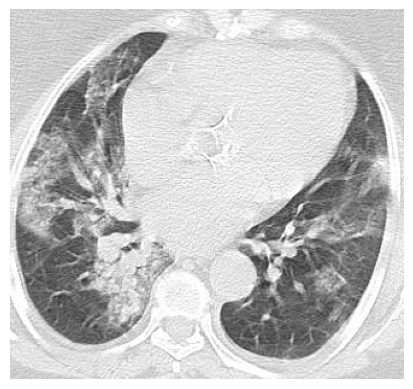

1/1 [==============================] - 0s 23ms/step
[[0.]]
covid


In [77]:
#calling a function
cov()

## It classifies as Covid 

## given input is Non-covid image

 /kaggle/input/ct-scan/CT_Scan_covid/non-COVID/Non-Covid (1001).png


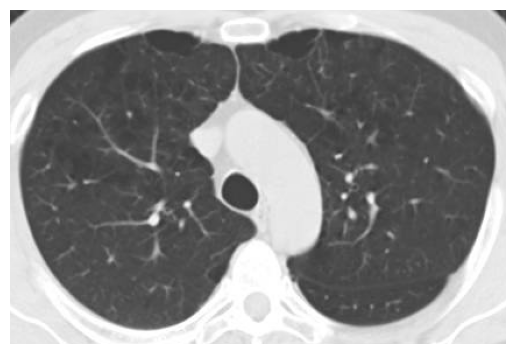

1/1 [==============================] - 0s 22ms/step
[[0.99990726]]
Non-covid


In [78]:
#calling a function
cov()

## It classifies as Non-Covid

## Saving the model for further use 

In [80]:
model1.save("Ct_Scan_Covid.h5")

In [87]:
# library to load the model
from tensorflow.keras.models import load_model

## Loading the Model to Check the Saved model

In [89]:
s_model = load_model('/kaggle/working/Ct_Scan_Covid.h5')

### in the below function i included our saved model that can predict real-world problems 

In [90]:
import cv2
import matplotlib.pyplot as plt
def saved_model():

    input_image_path =input()
    input_image = cv2.imread(input_image_path)

    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    # cv2.imshow("Image",input_image)
    input_image_resized = cv2.resize(input_image, (180,180))

    input_image_scaled = input_image_resized/255

    input_image_reshaped = np.reshape(input_image_scaled, [1,180,180,3])

    input_prediction = s_model.predict(input_image_reshaped)

    print(input_prediction)
    if input_prediction>0.5:
        print("Non-covid")
    else:
        print("covid")

## Giving input as Non-covid scan image

 /kaggle/input/ct-scan/CT_Scan_covid/non-COVID/Non-Covid (1002).png


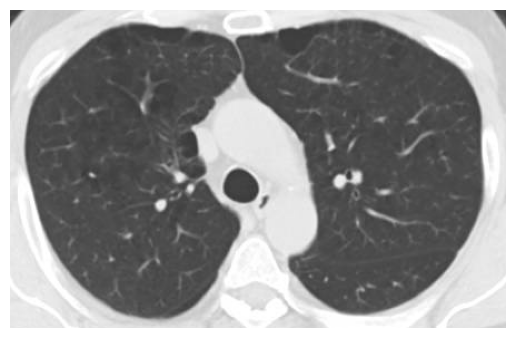

1/1 [==============================] - 1s 939ms/step
[[0.99836844]]
Non-covid


In [91]:
saved_model()

## it classifies as Non-covid

## Finally our model working properly and Classifies whether the ct_sacn belongs to Covid or non covid